In [1]:
# task1 - Import the pandas module.
import pandas as pd

In [2]:
#read data
yearly = pd.read_csv(r"C:\Users\samsa\OneDrive\Desktop\practice material\technolab\datasets\yearly_deaths_by_clinic.csv")

In [3]:
#view data
yearly

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


In [4]:
#task 2- Calculate the yearly proportion of deaths.
yearly["proportion_deaths"] = yearly['deaths'] / yearly['births']

In [5]:
# subset data for clinic1 
yearly1 = yearly[yearly['clinic'] == 'clinic 1']

In [6]:
# subset data for clinic2
yearly2 = yearly[yearly['clinic'] == 'clinic 2']

In [7]:
yearly1

,year,births,deaths,clinic,proportion_deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464


<AxesSubplot:xlabel='year'>

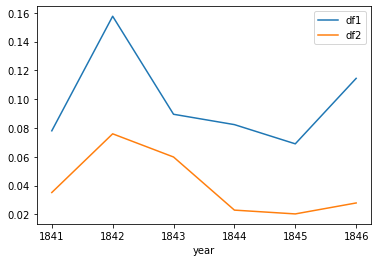

In [8]:
# task 3 - Plot the yearly proportion of deaths for both clinics.
ax = yearly1.plot(x="year", y="proportion_deaths",
              label="df1")
yearly2.plot(x="year", y="proportion_deaths",
         label="df2", ax=ax)

In [9]:
ax.set_ylabel("proportion_deaths")

Text(3.200000000000003, 0.5, 'proportion_deaths')

In [10]:
monthly = pd.read_csv(r"C:\Users\samsa\OneDrive\Desktop\practice material\technolab\datasets\monthly_deaths.csv", parse_dates=['date'])

In [11]:
#task4
monthly["proportion_deaths"] = monthly['deaths'] / monthly['births']

In [12]:
monthly.head(1)

,date,births,deaths,proportion_deaths
0,1841-01-01,254,37,0.145669


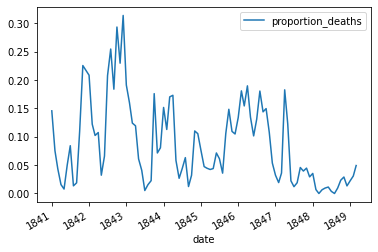

In [13]:
#task 5
ax1 = monthly.plot(x="date", y="proportion_deaths",
              )

In [14]:
# handwashing started from 1847
handwashing_start = pd.to_datetime('1847-01-01')

# Split monthly into before and after handwashing_start
before_washing = monthly[monthly['date'] < handwashing_start]
after_washing = monthly[monthly['date'] >= handwashing_start]

<AxesSubplot:xlabel='date'>

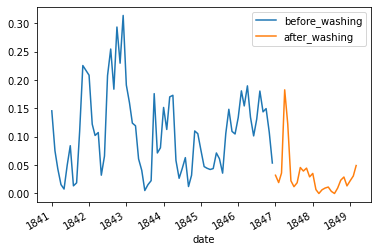

In [15]:
 # task - 6 Plot monthly proportion of deaths before and after handwashing
ax = before_washing.plot(x='date', y='proportion_deaths', label='before_washing') 
after_washing.plot(x='date', y='proportion_deaths', label='after_washing', ax=ax)

In [16]:
# task - 7 Calculate the average reduction in proportion of deaths due to handwashing.
before_proportion = before_washing['proportion_deaths']
after_proportion = after_washing['proportion_deaths']
avg_reduction = after_proportion.mean() - before_proportion.mean()
avg_reduction
#  ~7% reduction in death

-0.07519076642777145

In [18]:
#  tak 8 -bootstrap analysis of the difference in mean monthly proportion of deaths.
boot_mean_diff = []
for i in range(3000):
    boot_before = before_proportion.sample(frac=1, replace=True)
    boot_after = after_proportion.sample(frac=1, replace=True)
    boot_mean_diff.append(boot_after.mean() - boot_before.mean())

# Calculating a 95% confidence interval from boot_mean_diff 
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025, 0.975])
confidence_interval

0.025   -0.096528
0.975   -0.052604
dtype: float64

In [ ]:
 #task - 9 , it can be said that handwashing reduces death proportion by 5.3% to 9.6% 
 # shoud doctors wash their hands = True